SVM using SVR on salary_data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
#import dataset
data = pd.read_csv('./Data/Salary_data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
X = data.iloc[:,:-1].values
y = data.iloc[:, -1].values
y=y.reshape(len(y),1)

In [4]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
X_sc = StandardScaler()
y_sc = StandardScaler()
X = X_sc.fit_transform(X)
y = y_sc.fit_transform(y)

In [5]:
#   Training the SVR model on the whole dataset
from sklearn.svm import SVR
regression=SVR(kernel='rbf')
regression.fit(X,y)

C:\Users\Harsh Ranjan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [6]:
#y_sc.inverse_transform(regression.predict(X_sc.fit_transform([[10]])))

In [7]:
y_pred=regression.predict(X)
y_pred=y_sc.inverse_transform(y_pred.reshape(-1,1))
y_pred=y_pred.flatten()

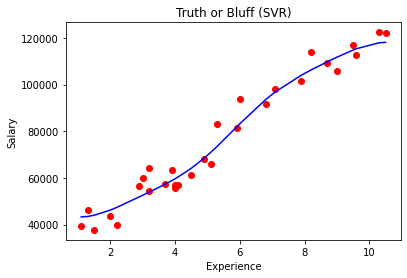

In [8]:
#Visualising the SVR results
plt.scatter(X_sc.inverse_transform(X).flatten(), y_sc.inverse_transform(y).flatten(), color = 'red')
plt.plot(X_sc.inverse_transform(X).flatten(), y_pred, color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()